# Example RL simulations on GridWorld Environments:
* Agents tested:
    * SARSA
    * Actor-Critic
    * Successor Representation
* Available Environments
    * Open-gridworld

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy as sp
import networkx as nx
import random

%matplotlib inline

from matplotlib import rc
plt.rcParams['font.size'] = '13'
plt.rcParams.update({'font.family':'sans-serif'})

In [2]:
from environments import GridEnvGenerator
from agents import SARSA_agent, SingleActorCritic

In [3]:
def run_sim(env, agent, n_episodes, n_steps):
    
    cs = (0,0)
    ns = (0,0)
    action = 0
    
    state_visits = np.zeros((grid_size, grid_size))
    episodic_error = []
    experiences = []
    
    cs_st = 0
    td_v = 0

    for ep in range(n_episodes):
        cs = (0,0)
        for k in range(n_steps):
            
            # initial action and next state reward sampling
            action = agent.sample_action(agent.tA[cs_st, :], beta)
            ns, reward, t_flag = env.get_next_state(cs, action)
            state_visits[cs[0],cs[1]] += 1

            # mapping graph id to state
            ns_st = env.node2state(ns)
            cs_st = env.node2state(cs)
            
            # sampling next action
            next_action = agent.sample_action(agent.tA[ns_st, :], beta)

            # updating value functions
            if (k > 1) and t_flag == False:
                experiences.append([cs_st, action, ns_st, next_action, reward, t_flag, ep])
                td_v = agent.update_td(experiences[-1])

            if t_flag == True:
                experiences.append([cs_st, action, ns_st, next_action, reward, t_flag, ep])
                td_v = agent.update_td(experiences[-1])
                episodic_error.append(np.mean(np.abs(td_v)))
                break

            cs = ns
        
    return experiences, episodic_error, state_visits

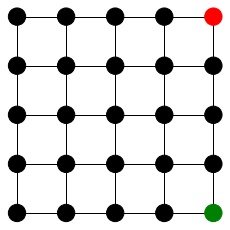

In [4]:
grid_size = 5
env = GridEnvGenerator(grid_size)
env.generate_open_gridworld()
env.pun = [(0,4), 0]
env.rwd = [(4,4), 10]
env.paint_nodes([3,3])

In [5]:
n_episodes = 20000
n_steps = 70

In [ ]:
node_list = list(env.G.nodes)
mSize = len(node_list)
n_actions = 4
gamma = 0.7
alpha = 0.01
beta = 0.7

sar = SARSA_agent(mSize, n_actions, alpha, gamma, beta)
xp, err, sv = run_sim(env, sar, n_episodes, n_steps)

In [ ]:
plt.imshow(sar.get_V())
plt.colorbar()

In [ ]:
plt.plot(err)

In [ ]:
divider = []
cax = []
im = []
fig, ax = plt.subplots(1,4, figsize=(20,20))
ax[0].set_title('up')
ax[1].set_title('down')
ax[2].set_title('left')
ax[3].set_title('right ')
for i in range(4):
    im = ax[i].imshow(np.reshape(sar.tA[:,i], [grid_size, grid_size]))
plt.show()

# SAC

In [ ]:
node_list = list(env.G.nodes)
mSize = len(node_list)
n_actions = 4
gamma = 0.6
alpha = [0.01, 0.01]
beta = 5

sac = SingleActorCritic(mSize, n_actions, alpha, gamma, beta)
xp, err, sv = run_sim(env, sac, n_episodes, n_steps)

In [ ]:
plt.imshow(sac.get_V())
plt.colorbar()

In [ ]:
plt.plot(err)

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(15,15))

ax[0].imshow(np.reshape(mac.tA[:,0], [grid_size, grid_size]))
ax[0].set_title('up')
ax[1].imshow(np.reshape(mac.tA[:,1], [grid_size, grid_size]))
ax[1].set_title('down')
ax[2].imshow(np.reshape(mac.tA[:,2], [grid_size, grid_size]))
ax[2].set_title('left')
ax[3].imshow(np.reshape(mac.tA[:,3], [grid_size, grid_size]))
ax[3].set_title('right')
plt.show()